# Raspagem de Dados da Play Store

** Objetivo desde repositorio é coletar informações dos aplicativos que estão na Play Store. **

** Aplicativos que selecionei para projeto são Facebook,Instagram,Twitter,Tik Tok, WhatsApp e Linkedin estes aplicativos da categoria de redes sociais mais utilizados. **

** Para coletar os dados vou utilizar o metodo de Web Scraping ou raspagem de dados da Web de sites, onde são usados scripts e programas. **

In [1]:
!pip install -qq google-play-scraper

In [2]:
# Importando as Bibliotecas 
import json
import pandas as pd
from tqdm import tqdm
 
import seaborn as Ana 
import matplotlib.pyplot as plt
 
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
 
from google_play_scraper import Sort, reviews, app
 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
Ana.set(style='whitegrid',palette='muted',font_scale=1.2)

In [35]:
# Criando uma lista com ids das URL's dos aplicativos
app_packages = [
     'com.zhiliaoapp.musically',
     'com.facebook.lite',
     'com.instagram.android',   
     'com.twitter.android',
     'com.whatsapp',
     'com.linkedin.android'
]

In [36]:
# raspar as informações de cada aplicativo
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='pt', country='br')
  del info['comments']
  app_infos.append(info)

100%|██████████| 6/6 [00:14<00:00,  2.44s/it]


In [37]:
# Vamos escrever uma função auxiliar que imprima objetos JSON
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [38]:
# Imprimir o objeto de JSON
print_json(app_infos[0])

{
  "adSupported": true,
  "androidVersion": "4.1",
  "androidVersionText": "4.1 ou superior",
  "appId": "com.zhiliaoapp.musically",
  "containsAds": true,
  "contentRating": "Classifica\u00e7\u00e3o 12 anos",
  "contentRatingDescription": "Linguagem Impr\u00f3pria",
  "currency": "USD",
  "description": "TikTok \u00e9 uma comunidade global de v\u00eddeos. Com TikTok(TiqueToque) criar v\u00eddeos\r\ncurtos se tornou ainda mais f\u00e1cil. Grave e edite seus pr\u00f3prios v\u00eddeos\r\ncom nossos efeitos especiais, filtros, stickers e muito mais. Depois \u00e9\r\ns\u00f3 compartilhar com o mundo seu talento.                                                                                                                                                                                \r\nAssista a milh\u00f5es de videos escolhidos especialmente pra voc\u00ea                                                        \r\nUma experi\u00eancia personalizada, baseada no conte\u00fado que voc\u00e

In [39]:
# Armazenando o objeto JSON no DataFrame
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [40]:
app_infos_df

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,TikTok,TikTok é uma comunidade global de vídeos. Com ...,TikTok é uma comunidade global de vídeos. Com ...,"Vídeos de memes, receita e músicas para compar...","Vídeos de memes, receita e músicas para compar...",1.000.000.000+,1000000000,3.654734,21733114,9726043,...,Linguagem Imprópria,True,True,14 de set. de 2015,1593349406,16.6.4,- Confira por que todos estão falando do TikTo...,- Confira por que todos estão falando do TikTo...,com.zhiliaoapp.musically,https://play.google.com/store/apps/details?id=...
1,Facebook Lite,<b>O Facebook Lite:</b>\r\n • <b>É instalado r...,<b>O Facebook Lite:</b><br> • <b>É instalado r...,Esta versão do Facebook usa menos dados e func...,Esta versão do Facebook usa menos dados e func...,1.000.000.000+,1000000000,4.156622,14755975,4786518,...,Linguagem Imprópria,True,True,15 de jun. de 2015,1593578746,Varia de acordo com o dispositivo,Melhoramentos para ser mais fiável e mais rápido.,Melhoramentos para ser mais fiável e mais rápido.,com.facebook.lite,https://play.google.com/store/apps/details?id=...
2,Instagram,Aproximando você das pessoas e de tudo que voc...,Aproximando você das pessoas e de tudo que voc...,Aproximando você das pessoas e de tudo que voc...,Aproximando você das pessoas e de tudo que voc...,1.000.000.000+,1000000000,4.483730,102175786,33556843,...,Linguagem Imprópria,True,True,3 de abr. de 2012,1593540550,Varia de acordo com o dispositivo,None,None,com.instagram.android,https://play.google.com/store/apps/details?id=...
3,Twitter,"<font color=""”blue”"">Receba notícias ao vivo e...","<font color=""”blue”"">Receba notícias ao vivo e...",Notícias em tempo real ⏰ Divertido e fácil de ...,Notícias em tempo real ⏰ Divertido e fácil de ...,500.000.000+,500000000,4.443828,15606971,4093756,...,"Sexo Explícito, Linguagem Imprópria, Conteúdo ...",True,True,30 de abr. de 2010,1593540558,Varia de acordo com o dispositivo,"Prepare-se para o novo modo escuro, agora com ...","Prepare-se para o novo modo escuro, agora com ...",com.twitter.android,https://play.google.com/store/apps/details?id=...
4,WhatsApp Messenger,WhatsApp do Facebook\r\n\r\nO WhatsApp Messeng...,WhatsApp do Facebook<br><br>O WhatsApp Messeng...,Simples. Pessoal. Seguro.,Simples. Pessoal. Seguro.,5.000.000.000+,5000000000,4.310659,115981544,33829422,...,None,None,None,18 de out. de 2010,1593021184,2.20.193.9,- Agora as chamadas de voz ou de vídeo podem t...,- Agora as chamadas de voz ou de vídeo podem t...,com.whatsapp,https://play.google.com/store/apps/details?id=...
5,LinkedIn,Utilize o LinkedIn para avançar na sua carreir...,Utilize o LinkedIn para avançar na sua carreir...,Conecte-se a profissionais. Conecte-se a oport...,Conecte-se a profissionais. Conecte-se a oport...,500.000.000+,500000000,4.363089,1708812,366632,...,Linguagem Imprópria,True,True,7 de abr. de 2011,1593644629,4.1.467,Obrigado por ser um usuário do LinkedIn! Atual...,Obrigado por ser um usuário do LinkedIn! Atual...,com.linkedin.android,https://play.google.com/store/apps/details?id=...


In [41]:
# raspar os comentários de cada aplicativo
app_reviews = []
for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='pt-br',
        country='br',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 6/6 [02:10<00:00, 21.69s/it]


In [42]:
print_json(app_reviews[0])

{
  "appId": "com.zhiliaoapp.musically",
  "at": "2020-07-03 21:43:53",
  "content": "Outro problema, n\u00e3o consigo acessar minha conta. Quando tento a seguinte mensagem aparece \"Voc\u00ea est\u00e1 acessando nosso servi\u00e7o com muita frequ\u00eancia\". O que isso significa, por favor, fa\u00e7am algo pra essa plataforma funcionar, \u00e9 realmente frustante passe por essa situa\u00e7\u00e3o. N\u00e3o queria deixar de usar o Tik Tok, mas pelo visto terei de migrar para outro app semelhante.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "16.6.4",
  "reviewId": "gp:AOqpTOFfhk7lYUJXhBKlEBQz7_6v-lcP0g6lXcS2iya9MQRiESXUkWovT0FTFulF9JfZqCavMdgmXwDfloF3fg",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 902,
  "userImage": "https://lh3.googleusercontent.com/a-/AOh14GhPO0O5HwdzDGfmJul5HE82kmh0D8myqaSD5uTycA",
  "userName": "Manu Silva"
}



In [43]:
# Quantidades de linhas 
len(app_reviews)

7200

In [44]:
# Armazenando os dados dos comenentários 
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)


In [45]:
# Visualizando os dados 
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOFfhk7lYUJXhBKlEBQz7_6v-lcP0g6lXcS2iya...,Manu Silva,https://lh3.googleusercontent.com/a-/AOh14GhPO...,"Outro problema, não consigo acessar minha cont...",1,902,16.6.4,2020-07-03 21:43:53,None,NaT,most_relevant,com.zhiliaoapp.musically
1,gp:AOqpTOE0-OUh-Pe304rx0RkVC46aKpQKl9v7_vMVXID...,Gildeon Ribeiro Rocha,https://lh3.googleusercontent.com/a-/AOh14GiAG...,"O aplicativo em si é bom, o problema está quan...",1,1169,16.6.4,2020-06-29 11:38:53,None,NaT,most_relevant,com.zhiliaoapp.musically
2,gp:AOqpTOFc1okg3e2HDlzGjO-JZUjE-Gz3nCHgWE6Agyr...,Kitty Luar,https://lh3.googleusercontent.com/a-/AOh14GgSe...,Eu estou extremamente desapontada pelo fato do...,1,1424,16.6.4,2020-06-24 14:10:10,None,NaT,most_relevant,com.zhiliaoapp.musically
3,gp:AOqpTOFP4z2ZWl97s63TgKGvuc-N0YudJqx5IpGj3b9...,José Alexandre,https://lh3.googleusercontent.com/a-/AOh14Gh4G...,"Amo o app, amo os vídeos das pessoas que eu si...",1,317,16.5.5,2020-06-25 22:55:15,None,NaT,most_relevant,com.zhiliaoapp.musically
4,gp:AOqpTOGJDvgQ3PcSNaFuxVCDY0OJnrcOWQlXB4FQJwP...,Murieli Negri Bastos,https://lh3.googleusercontent.com/a-/AOh14Gjrf...,"Estou decepcionada com o app, adorei fazer víd...",1,288,16.6.4,2020-06-30 07:30:20,None,NaT,most_relevant,com.zhiliaoapp.musically


In [27]:
!pip install -qq transformers

In [28]:
!pip install transformers --upgrade

Requirement already up-to-date: transformers in c:\users\victo\anaconda3\envs\area de trabalho\lib\site-packages (3.0.1)


In [46]:
#Importando as Bibliotecas
import transformers
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [47]:

df = pd.read_csv("reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOFfhk7lYUJXhBKlEBQz7_6v-lcP0g6lXcS2iya...,Manu Silva,https://lh3.googleusercontent.com/a-/AOh14GhPO...,"Outro problema, não consigo acessar minha cont...",1,902,16.6.4,2020-07-03 21:43:53,NaN,NaN,most_relevant,com.zhiliaoapp.musically
1,gp:AOqpTOE0-OUh-Pe304rx0RkVC46aKpQKl9v7_vMVXID...,Gildeon Ribeiro Rocha,https://lh3.googleusercontent.com/a-/AOh14GiAG...,"O aplicativo em si é bom, o problema está quan...",1,1169,16.6.4,2020-06-29 11:38:53,NaN,NaN,most_relevant,com.zhiliaoapp.musically
2,gp:AOqpTOFc1okg3e2HDlzGjO-JZUjE-Gz3nCHgWE6Agyr...,Kitty Luar,https://lh3.googleusercontent.com/a-/AOh14GgSe...,Eu estou extremamente desapontada pelo fato do...,1,1424,16.6.4,2020-06-24 14:10:10,NaN,NaN,most_relevant,com.zhiliaoapp.musically
3,gp:AOqpTOFP4z2ZWl97s63TgKGvuc-N0YudJqx5IpGj3b9...,José Alexandre,https://lh3.googleusercontent.com/a-/AOh14Gh4G...,"Amo o app, amo os vídeos das pessoas que eu si...",1,317,16.5.5,2020-06-25 22:55:15,NaN,NaN,most_relevant,com.zhiliaoapp.musically
4,gp:AOqpTOGJDvgQ3PcSNaFuxVCDY0OJnrcOWQlXB4FQJwP...,Murieli Negri Bastos,https://lh3.googleusercontent.com/a-/AOh14Gjrf...,"Estou decepcionada com o app, adorei fazer víd...",1,288,16.6.4,2020-06-30 07:30:20,NaN,NaN,most_relevant,com.zhiliaoapp.musically


In [31]:
df.shape


(3600, 12)

In [48]:
#Visualizando as informações do Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              7200 non-null   object
 1   userName              7200 non-null   object
 2   userImage             7200 non-null   object
 3   content               7200 non-null   object
 4   score                 7200 non-null   int64 
 5   thumbsUpCount         7200 non-null   int64 
 6   reviewCreatedVersion  6264 non-null   object
 7   at                    7200 non-null   object
 8   replyContent          445 non-null    object
 9   repliedAt             445 non-null    object
 10  sortOrder             7200 non-null   object
 11  appId                 7200 non-null   object
dtypes: int64(2), object(10)
memory usage: 675.1+ KB


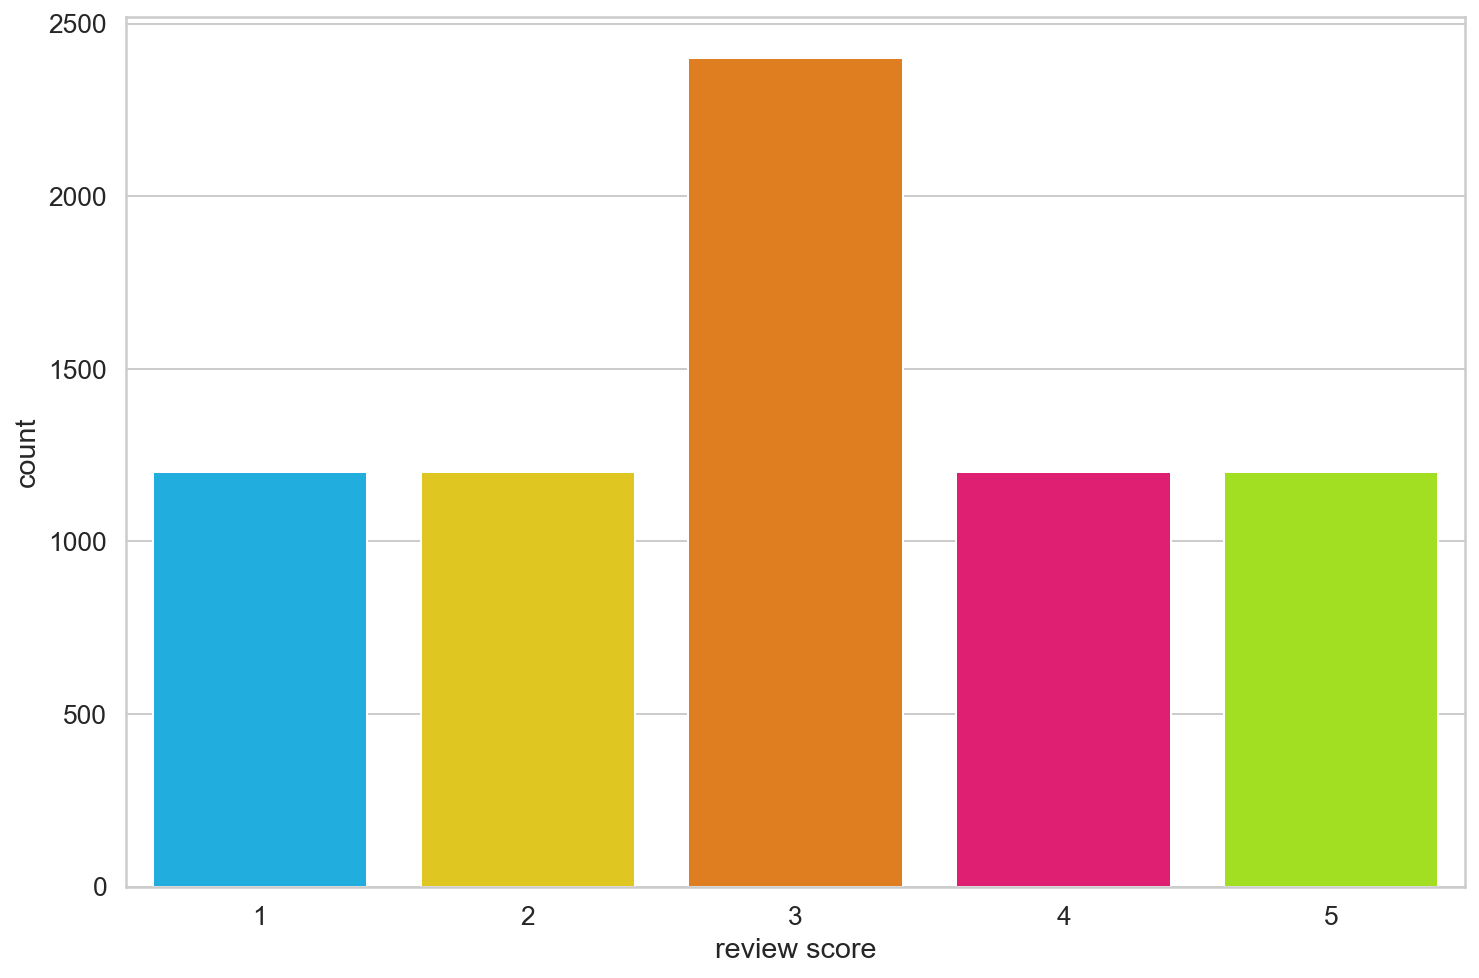

In [49]:
# Visualizar o score dos aplicativos
sns.countplot(df.score)
plt.xlabel('review score');

In [50]:
#Condicional que classifica o sentimento
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2

In [51]:
#Aplicando função considicional no Dataset
df['sentiment'] = df.score.apply(to_sentiment)

In [52]:
#Criando feature de classe
class_names = ['negative', 'neutral', 'positive']

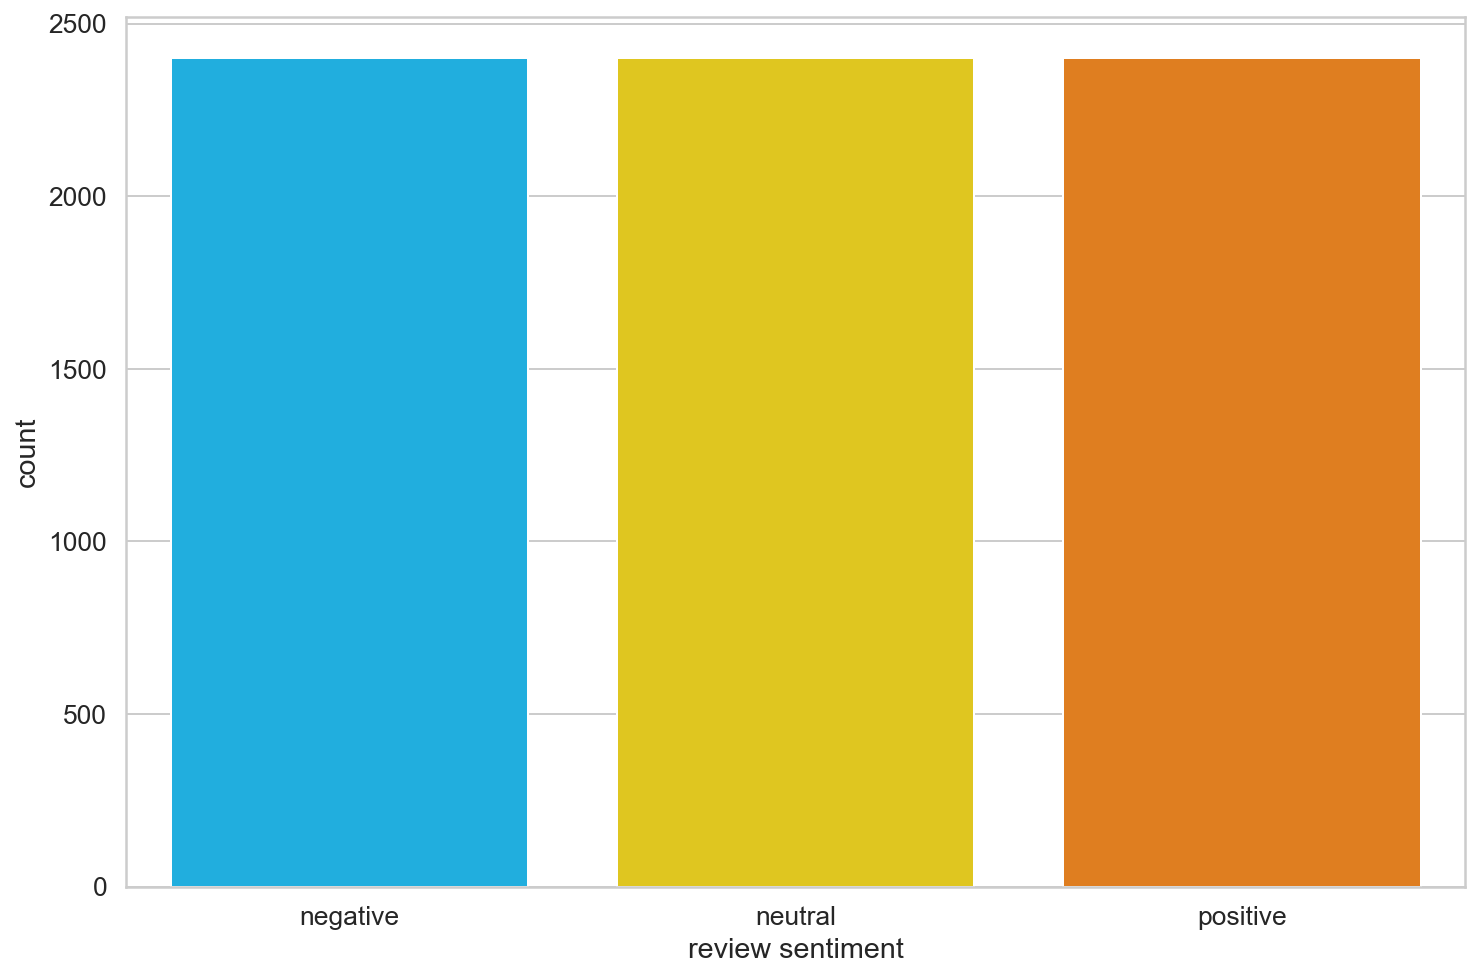

In [53]:
# Visulizar os sentimentos 
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

## Resultado

Pode-se notar que Raspagem de Dados facilita muito na coleta de informações e realizar analise mais profunda.
Ao plotar o priemeiro grafico podemos concluir que o resultado do score é balanceados, cada aplicativos esta com score maximo de 3. Em sequência apliquei uma condição para classificar sentimento através do score e resultado está equilibrado.

*** Observação: Este dados foi coletado no periodo 05 de Julho de 2020. ***